In [1]:
import keras
from keras.datasets import cifar10

# Load the pre-shuffled train and test data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


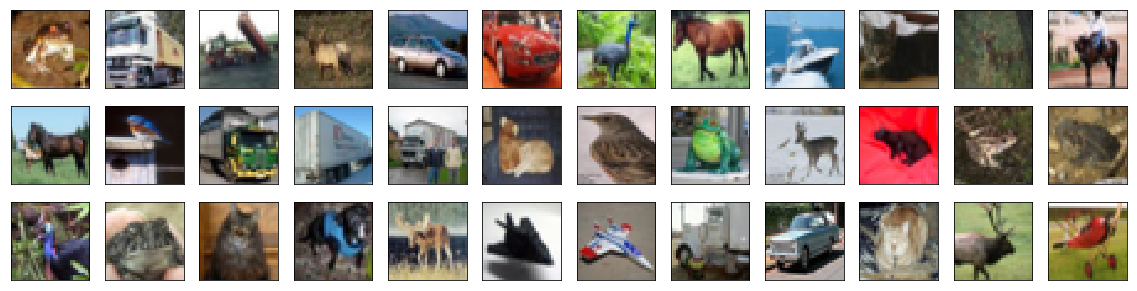

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_train[i]))

In [3]:
# Rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [4]:
from keras.utils import np_utils

# One-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Break training set into training and validation sets
(X_train, X_valid) = X_train[5000:], X_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Print shape of training set
print('x_train shape:', X_train.shape)

# Print number of training, validation, and test images
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


In [23]:
#Define the model architecture(Model 1)
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dense, Dropout, Activation

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, strides=1, padding='valid', activation='relu', 
                 input_shape = X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=2, padding='valid'))
model.add(Conv2D(filters=32, kernel_size=2, strides=1, padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=2, padding='valid'))
model.add(Conv2D(filters=64, kernel_size=2, strides=1, padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=2, padding='valid'))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 31, 31, 16)        208       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 32)        2080      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 6, 6, 64)          8256      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
__________

In [24]:
#Define the model architecture(Model 2)
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [28]:
# Compile the model
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [29]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Defining some callbacks
callback_1 = EarlyStopping(monitor='val_acc', patience=5, verbose=1, restore_best_weights=True, mode='max')
callback_2 = ModelCheckpoint(monitor='val_loss', filepath='my_soln_cifar10_best_weights', verbose=1, 
                             save_best_only=True, mode='min')

# Fitting the model
model.fit(X_train, y_train, batch_size=100, epochs=50, validation_data=(X_valid, y_valid),
         callbacks = [callback_1], verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/50
 - 5s - loss: 0.6003 - acc: 0.7981 - val_loss: 0.6612 - val_acc: 0.7880
Epoch 2/50
 - 5s - loss: 0.5619 - acc: 0.8115 - val_loss: 0.6856 - val_acc: 0.7866
Epoch 3/50
 - 5s - loss: 0.5290 - acc: 0.8205 - val_loss: 0.6274 - val_acc: 0.7998
Epoch 4/50
 - 4s - loss: 0.4944 - acc: 0.8299 - val_loss: 0.6348 - val_acc: 0.7908
Epoch 5/50
 - 4s - loss: 0.4890 - acc: 0.8330 - val_loss: 0.6295 - val_acc: 0.8004
Epoch 6/50
 - 4s - loss: 0.4521 - acc: 0.8444 - val_loss: 0.6394 - val_acc: 0.8078
Epoch 7/50
 - 5s - loss: 0.4343 - acc: 0.8519 - val_loss: 0.6184 - val_acc: 0.8066
Epoch 8/50
 - 5s - loss: 0.4219 - acc: 0.8542 - val_loss: 0.6636 - val_acc: 0.7920
Epoch 9/50
 - 5s - loss: 0.4026 - acc: 0.8607 - val_loss: 0.6359 - val_acc: 0.8062
Epoch 10/50
 - 5s - loss: 0.3859 - acc: 0.8664 - val_loss: 0.7045 - val_acc: 0.8026
Epoch 11/50
 - 4s - loss: 0.3737 - acc: 0.8688 - val_loss: 0.6363 - val_acc: 0.8060
Restoring model weights from the end

In [ ]:
# # If callback_2 is used, uncomment the next line to load best weigths
# model.load_weights('my_soln_cifar10_best_weights')

In [30]:
# Evaluate and print test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7973


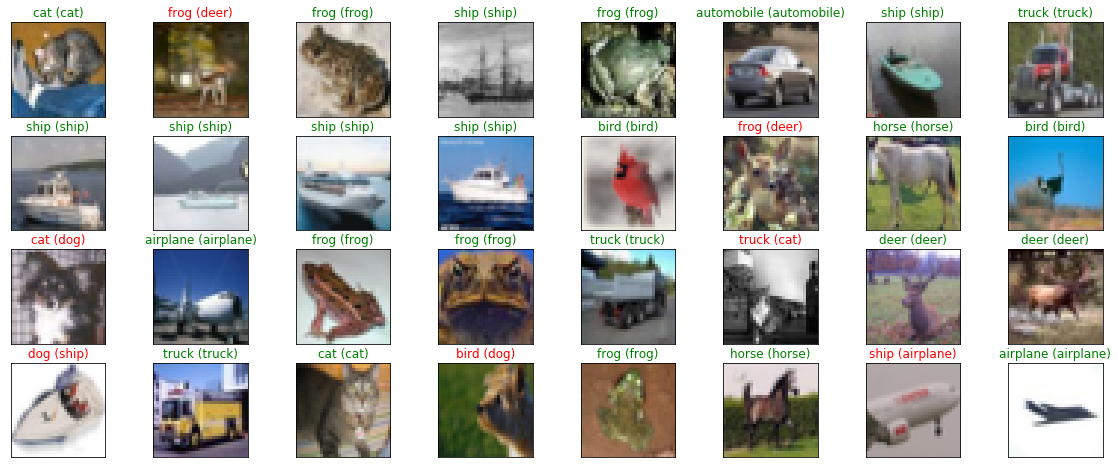

In [13]:
# Get predictions on the test set
y_hat = model.predict(X_test)

# Define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))